In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Data Wrangling

Data wrangling is a step to conver data from an initial format to a format that may be better for the analysis

In [2]:
# import the dataset
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

df = pd.read_csv(path, header = None)

In [3]:
#display the first 5 row
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#get the info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    int64  
 1   1       205 non-null    object 
 2   2       205 non-null    object 
 3   3       205 non-null    object 
 4   4       205 non-null    object 
 5   5       205 non-null    object 
 6   6       205 non-null    object 
 7   7       205 non-null    object 
 8   8       205 non-null    object 
 9   9       205 non-null    float64
 10  10      205 non-null    float64
 11  11      205 non-null    float64
 12  12      205 non-null    float64
 13  13      205 non-null    int64  
 14  14      205 non-null    object 
 15  15      205 non-null    object 
 16  16      205 non-null    int64  
 17  17      205 non-null    object 
 18  18      205 non-null    object 
 19  19      205 non-null    object 
 20  20      205 non-null    float64
 21  21      205 non-null    object 
 22  22

In [5]:
#get the column name
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df.columns = headers

## Identify and Handle Missing Value

In [6]:
#convert ? to NaN
df = df.replace('?', np.nan)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
#evaluating for the missing data
missingData = df.isnull()
missingData.head()

#true means that the data in that place is a missing value

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#count missing value for each of the column
#using the method .value_counts() to count every valluie that appear in the columns
for column in missingData:
    print(column)
    print(missingData[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

## Deal with the Missing Value

<b>How should you deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row, <b>if most value of its row its missing, or the missing one is y / dependent variable</b><br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

In [9]:
#Deal with "normalized-losses" column
avgNrm = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avgNrm, inplace = True)

df['normalized-losses'].isnull().value_counts()

,count
normalized-losses,
False,205


In [10]:
#deal with "bore" column
avgBore = df['bore'].astype('float').mean(axis = 0)
df['bore'].replace(np.nan, avgBore, inplace = True)

df['bore'].isnull().value_counts()

,count
bore,
False,205


In [11]:
#deal with stroke column
avgStr = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, avgStr, inplace = True)

df['stroke'].isnull().value_counts()

,count
stroke,
False,205


In [12]:
#deal with the horsepower column
avgHrs = df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avgHrs, inplace = True)

df['horsepower'].isnull().value_counts()

,count
horsepower,
False,205


In [13]:
#deal with the peak-rpm column
avgHrs = df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avgHrs, inplace = True)

df['peak-rpm'].isnull().value_counts()

,count
peak-rpm,
False,205


In [14]:
#deal with the num of door column

#see the values that are present in particular column
print("all types:\n",df['num-of-doors'].value_counts())

#see the mode
print("mode:", df['num-of-doors'].value_counts().idxmax())

#replace the missing value
mode = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, mode, inplace = True)

print(df['num-of-doors'].isnull().value_counts())

all types:
 num-of-doors
four    114
two      89
Name: count, dtype: int64
mode: four
num-of-doors
False    205
Name: count, dtype: int64


In [15]:
#last, drop ALL ROW that have missed price, because price is a predict variables (Y)

df.dropna(subset=['price'], axis = 0, inplace = True)

#reset index because we droped two rows
df.reset_index(drop = True, inplace = True)

In [16]:
#check again for the missing values :
for column in missingData:
    print(column)
    print(missingData[column].isnull().value_counts())

symboling
symboling
False    205
Name: count, dtype: int64
normalized-losses
normalized-losses
False    205
Name: count, dtype: int64
make
make
False    205
Name: count, dtype: int64
fuel-type
fuel-type
False    205
Name: count, dtype: int64
aspiration
aspiration
False    205
Name: count, dtype: int64
num-of-doors
num-of-doors
False    205
Name: count, dtype: int64
body-style
body-style
False    205
Name: count, dtype: int64
drive-wheels
drive-wheels
False    205
Name: count, dtype: int64
engine-location
engine-location
False    205
Name: count, dtype: int64
wheel-base
wheel-base
False    205
Name: count, dtype: int64
length
length
False    205
Name: count, dtype: int64
width
width
False    205
Name: count, dtype: int64
height
height
False    205
Name: count, dtype: int64
curb-weight
curb-weight
False    205
Name: count, dtype: int64
engine-type
engine-type
False    205
Name: count, dtype: int64
num-of-cylinders
num-of-cylinders
False    205
Name: count, dtype: int64
engine-size
engine

### Data Formatting

In [17]:
#convert the object type to the float or integer datatypes

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [18]:
#recheck all of the datatypes again

df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


### Data Standardization

Standardization is a process of transforming the data into a common format, that allowing the researcher to make the meaningful comparison

In [19]:
df['city-L/100km'] = 235/df['city-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


In [20]:
df['highway-L/100km'] = 235/df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization

In [21]:
#Normalize and scale the columns length, width and heigth
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[['length','width','height']]

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027
...,...,...,...
196,0.907256,0.956944,0.928094
197,0.907256,0.955556,0.928094
198,0.907256,0.956944,0.928094
199,0.907256,0.956944,0.928094


### Data Binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' or 'category' or 'group' for grouped analysis

In [22]:
df['horsepower'] = df['horsepower'].astype(int, copy = True)
# it will copy the original data so that the original will not make a change

Text(0.5, 1.0, 'horsepower bins')

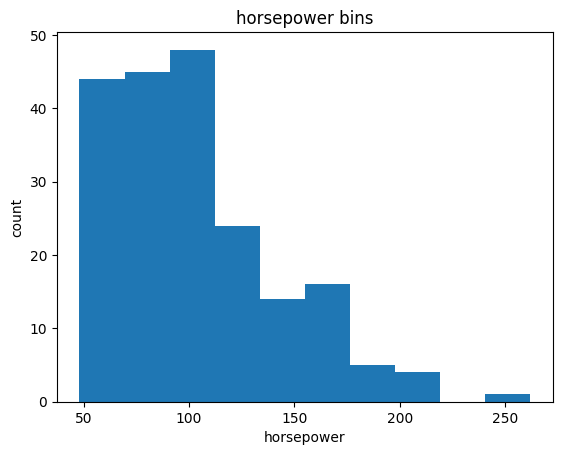

In [23]:
#plot the column to a histogram
plt.hist(df["horsepower"])

#set the xlabel, ylabel n title
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

In [24]:
#make a bin through linspace
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
#cause we want to make 3 categories, then we need 4 dividers
#1 cat : from a to b, 2 cat : from b to c, 3 cat : from c to d
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [25]:
#set the group names
name = ['low','medium','high']

In [26]:
#apply the cut function for the binning
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = name, include_lowest = True)
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low
5,110,low
6,110,low
7,110,low
8,140,medium
9,101,low


In [27]:
#see the number of vehicles in each bin
df['horsepower-binned'].value_counts()

,count
horsepower-binned,
low,153
medium,43
high,5


Text(0.5, 1.0, 'horsepower bins')

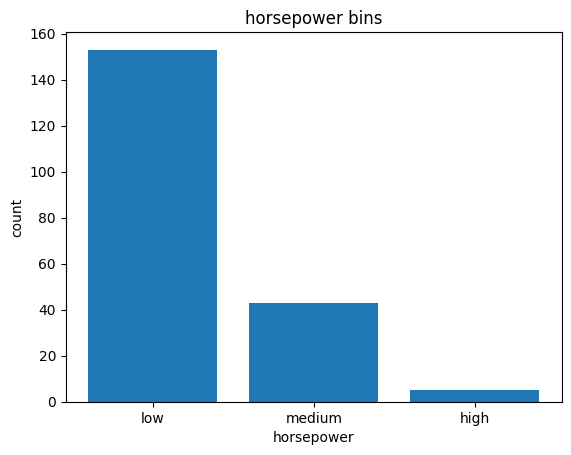

In [28]:
#plot the distribution for each bin
plt.bar(name, df['horsepower-binned'].value_counts())

#set the label
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")

(array([153.,  43.,   5.]),
 array([ 48.        , 119.33333333, 190.66666667, 262.        ]),
 <BarContainer object of 3 artists>)

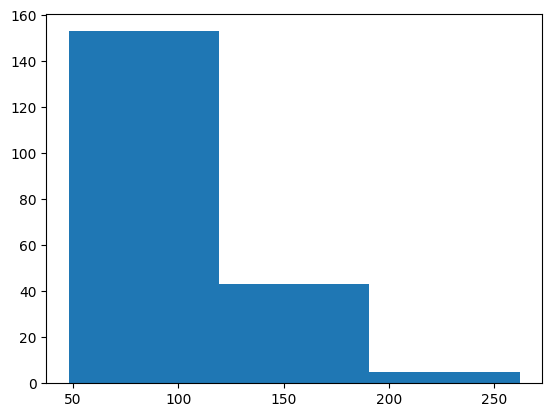

In [29]:
#we can also use a histogram of the distribution of bins that we created above

plt.hist(df['horsepower'], bins = 3)

## Indicator Variable

An indicator variable is a numerical variable used to label categories. They called dummies because the numbers themselves dont have an inherent meaning

In [30]:
#create the dummy for FUEL TYPE
dummyvar1 = pd.get_dummies(df['fuel-type'])
dummyvar1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [31]:
#change the column names for clarity
dummyvar1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace = True)
dummyvar1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [32]:
#merge both of diesel and gas to a single column fuel-type
df = pd.concat([df, dummyvar1], axis = 1) #axis = 1 , columns
df.drop("fuel-type", axis = 1, inplace = True)

In [33]:
#create a dummy for ASPIRATION
dummyvar2 = pd.get_dummies(df['aspiration'])
dummyvar2.rename(columns = {'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace = True)

dummyvar2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [34]:
#merge the dataset
df = pd.concat([df, dummyvar2], axis = 1)
df.drop('aspiration', axis = 1, inplace = True)

df[['aspiration-std','aspiration-turbo']]

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
196,True,False
197,False,True
198,True,False
199,False,True


In [35]:
#final result
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,low,False,True,True,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          201 non-null    int64   
 1   normalized-losses  201 non-null    int64   
 2   make               201 non-null    object  
 3   num-of-doors       201 non-null    object  
 4   body-style         201 non-null    object  
 5   drive-wheels       201 non-null    object  
 6   engine-location    201 non-null    object  
 7   wheel-base         201 non-null    float64 
 8   length             201 non-null    float64 
 9   width              201 non-null    float64 
 10  height             201 non-null    float64 
 11  curb-weight        201 non-null    int64   
 12  engine-type        201 non-null    object  
 13  num-of-cylinders   201 non-null    object  
 14  engine-size        201 non-null    int64   
 15  fuel-system        201 non-null    object  
 16  bore    

# 2. Exploratory Data Analysis

## Correlation between Variables

In [37]:
#we will calculate the correlation between variables of type 'int' or 'float'
dff = df._get_numeric_data()
dff.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,-0.063561,-0.033956,-0.034636,0.082269,0.036133,0.047089,0.241064,-0.241064,-0.218233,0.218233


In [38]:
#find for some correlation
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## Visualization of Continous Numerical Variables

<Axes: xlabel='engine-size', ylabel='price'>

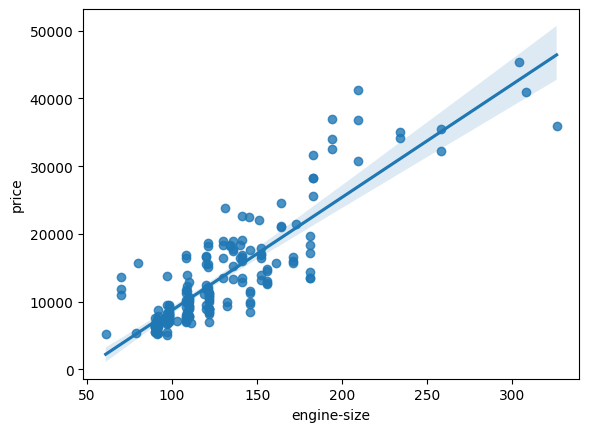

In [39]:
#positive linear relationship, between enginesize n price

sns.regplot(x='engine-size', y='price', data = df)

Engine-size is a preety good predictor for price since the regression line is almost a perfect diagonal line,  
to proof it, we will check the correlation value

In [40]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<Axes: xlabel='highway-mpg', ylabel='price'>

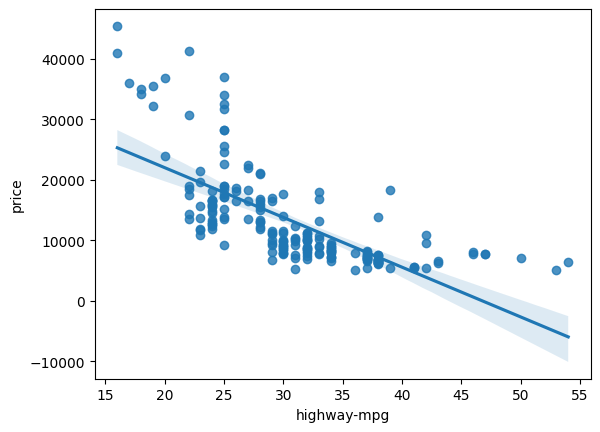

In [41]:
#negative linear relationship, between highway mpg and price

sns.regplot(x='highway-mpg', y='price',data = df)

In [42]:
#as highway mpg goes up, the price goes down, it is a negative relationship
#examine with cor value
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<Axes: xlabel='peak-rpm', ylabel='price'>

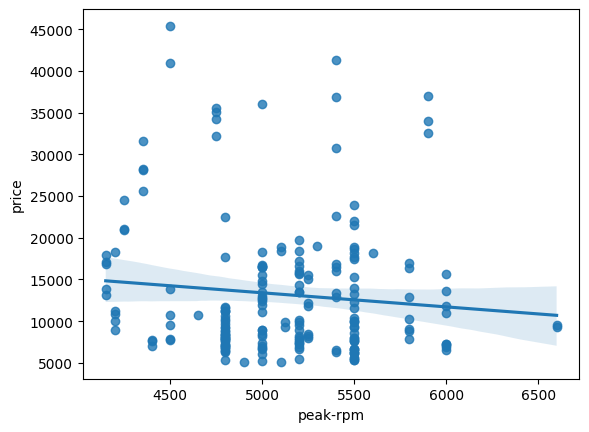

In [43]:
#weak linear relationship
sns.regplot(x="peak-rpm", y="price", data=df)

In [44]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [45]:
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


<Axes: xlabel='stroke', ylabel='price'>

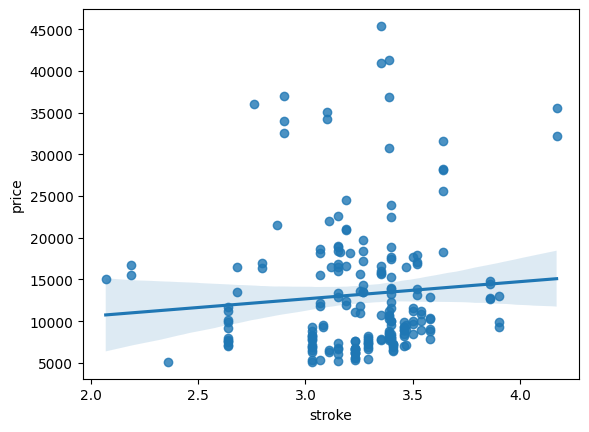

In [46]:
sns.regplot(x='stroke', y='price',data=df)

## Visualization of Categorical Variables

The good way to visualize categorical variables is by using boxplot, because these are variables that describe a characteristic of a data unit, and are selected from a small group of categories

<Axes: xlabel='body-style', ylabel='price'>

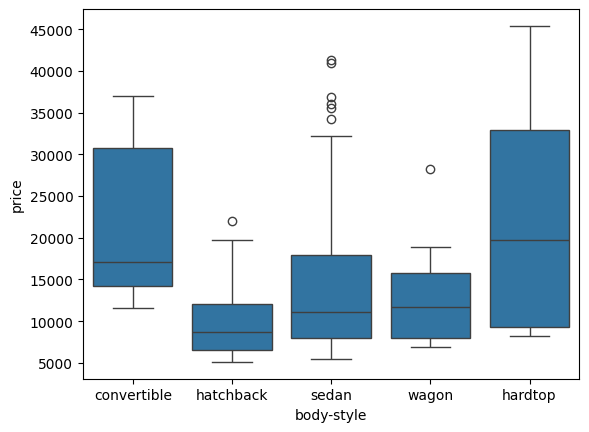

In [47]:
sns.boxplot(x='body-style', y = 'price', data = df)

<Axes: xlabel='engine-location', ylabel='price'>

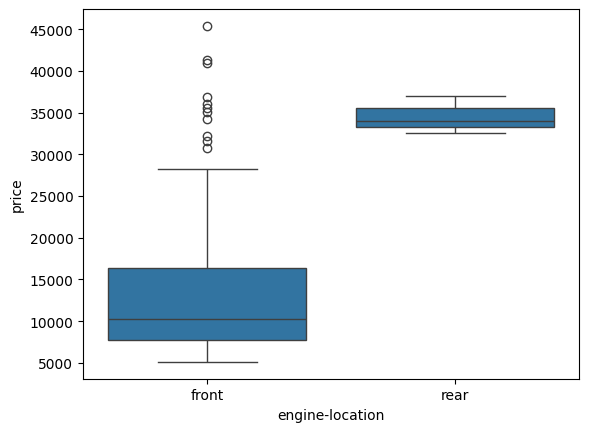

In [48]:
sns.boxplot(x="engine-location", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

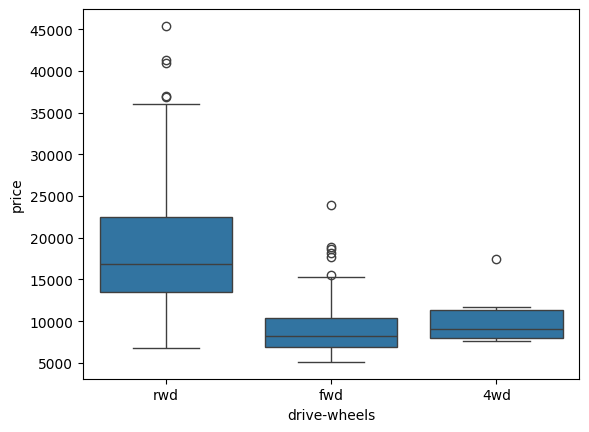

In [49]:
sns.boxplot(x="drive-wheels", y="price", data=df)

## Descriptive Statistical Analysis

In [50]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [51]:
df.describe(include = ['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


## Value Counts

In [52]:
dfw = df['drive-wheels'].value_counts().to_frame()
dfw.rename(columns = {'drive-wheels':'value_counts'}, inplace = True)
dfw.index.name = 'drive-wheels'
dfw

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [53]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


## Basics of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

Example,  
1. Drive-wheels have 3 unique values    
2. Body style have 5 unique values   
Grouping is to group all of their each unique categorical values

#### GROUP

In [54]:
dfgroup = df[['drive-wheels','body-style','price']]
dfgrouped = dfgroup.groupby(['body-style','drive-wheels'],  as_index=False).mean()
dfgrouped

#logically, it will group based on the column in the groupby parameter
#ex, group by body-style : it will count average of the price based on each category that request for

,body-style,drive-wheels,price
0,convertible,fwd,11595.000000
1,convertible,rwd,23949.600000
2,hardtop,fwd,8249.000000
3,hardtop,rwd,24202.714286
4,hatchback,4wd,7603.000000
5,hatchback,fwd,8396.387755
6,hatchback,rwd,14337.777778
7,sedan,4wd,12647.333333
8,sedan,fwd,9811.800000
9,sedan,rwd,21711.833333


**PIVOT TABLE**

In [55]:
#pivot table, a way to easier the understand of grouping
pivot = dfgrouped.pivot(index = 'drive-wheels', columns = 'body-style')

#there are some missing value, so we will replace it by 0
pivot = pivot.fillna(0)

pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [56]:
df1 = df[['body-style','price']]
df2 = df1.groupby(['body-style'], as_index = False).mean()
df2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


**HEAT MAP**

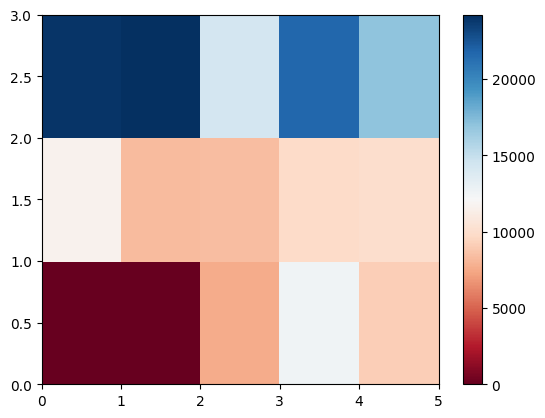

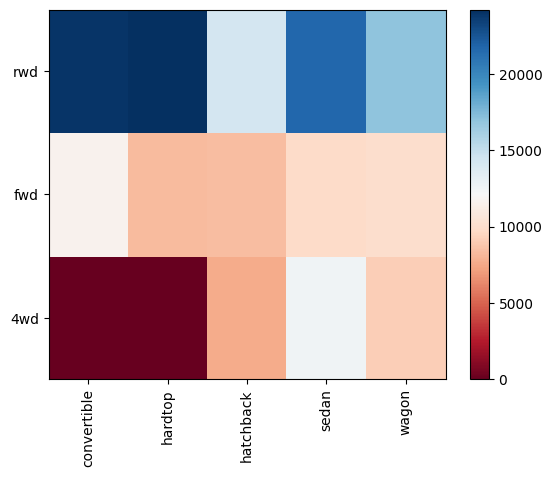

In [57]:
#basic heatmap visualization
plt.pcolor(pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

fig, ax = plt.subplots()
im = ax.pcolor(pivot, cmap='RdBu')

#label names
row_labels = pivot.columns.levels[1]
col_labels = pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation and Causation

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

In [58]:
#Correlation between wheel-base and price
pearson, pval = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson, " with a P-value of P =", pval)

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732885e-20


<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585).</p>

In [59]:
#horsepower vs price
stats.pearsonr(df['horsepower'],df['price'])

PearsonRResult(statistic=0.8096068016571054, pvalue=6.273536270650351e-48)

<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).</p>


In [60]:
#length vs price
stats.pearsonr(df['length'],df['price'])

PearsonRResult(statistic=0.6906283804483639, pvalue=8.01647746615924e-30)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>


In [61]:
#width vs price
stats.pearsonr(df['width'],df['price'])

PearsonRResult(statistic=0.7512653440522673, pvalue=9.20033551048206e-38)

#### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).


In [62]:
#curb weight vs price
stats.pearsonr(df['curb-weight'], df['price'])

PearsonRResult(statistic=0.8344145257702843, pvalue=2.189577238893965e-53)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>


In [63]:
#engine size vs price
stats.pearsonr(df['engine-size'], df['price'])

PearsonRResult(statistic=0.8723351674455185, pvalue=9.265491622198793e-64)

<h4>Conclusion:</h4>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>


In [64]:
#bore vs price
stats.pearsonr(df['bore'], df['price'])

PearsonRResult(statistic=0.5431553832626602, pvalue=8.049189483935315e-17)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>


In [ ]:
#city mpg vs price
stats.pearsonr(df['city-mpg'], df['price'])

PearsonRResult(statistic=-0.6865710067844678, pvalue=2.3211320655675098e-29)

<h4>Conclusion:</h4>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of about -0.687 shows that the relationship is negative and moderately strong.</p>


In [ ]:
#highway mpg vs price
stats.pearsonr(df['highway-mpg'], df['price'])

PearsonRResult(statistic=-0.704692265058953, pvalue=1.749547114447557e-31)

#### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.


# 3. Model Development

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#Create a linear regression object
lm = LinearRegression()

In [ ]:
# we want to create a model between highway-mpg and price
x = df[['highway-mpg']]
y = df[['price']]

lm.fit(x,y)

LinearRegression()

In [ ]:
# use the model for the output
Yhat = lm.predict(x)
Yhat[0:10]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508],
       [17879.97140011],
       [17879.97140011],
       [17879.97140011],
       [21988.63829172],
       [14593.03788682]])

In [ ]:
#Search for the linear regression equation
b0 = lm.intercept_
b1 = lm.coef_
print ("The linear regression model is :\ny =",b0,"+",b1,"x")

The linear regression model is :
y = [38423.30585816] + [[-821.73337832]] x


**Exercise**

In [ ]:
#create the other lm object for the other model
lm1 = LinearRegression()

x = df[['engine-size']]
y = df[['price']]

lm1.fit(x,y)

print ('slope',lm1.coef_, 'intercept', lm1.intercept_)

print('equation : y = ',lm1.intercept_,'+',lm1.coef_,'x')

slope [[166.86001569]] intercept [-7963.33890628]
equation : y =  [-7963.33890628] + [[166.86001569]] x


## Multiple Linear Regression

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


$$
Y: Response \ Variable\\\\\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\\\\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$


In [ ]:
#slicing the dataset that we want to modelling
c = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df[['price']]

In [ ]:
#create the multiple linear regression object
lm2 = LinearRegression()

lm2.fit(c,y)

LinearRegression()

In [ ]:
#search for the intercept and coefficient/slope value
intercept = lm2.intercept_
slope = lm2.coef_
slope = list(slope)
print ('intercept : ',lm2.intercept_)
print ('slope : ',lm2.coef_)

intercept :  [-15811.86376773]
slope :  [[53.53022809  4.70805253 81.51280006 36.1593925 ]]


In [ ]:
# finalize the model
# print ('The model is:\ny =',intercept,'=',slope[0],'x1 +',slope[1],'x2 +',slope[2],'x3 +',slope[3],'x4')

In [ ]:
# make a prediction, which the parameter is the input/independent/x variable
yhats = lm2.predict(c)
yhats[0:4]

array([[13699.07700462],
       [13699.07700462],
       [19052.71346719],
       [10620.61524404]])

So the model is:   

<b>Price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


**Exercise**

In [ ]:
lm3 = LinearRegression()

x = df[['normalized-losses','highway-mpg']]
y = df[['price']]
lm3.fit (x,y)

LinearRegression()

In [ ]:
print (lm3.coef_)

[[   1.49789586 -820.45434016]]


## Model Evaluation using Visualization

### Regression Plot

(0.0, 48172.800302613265)

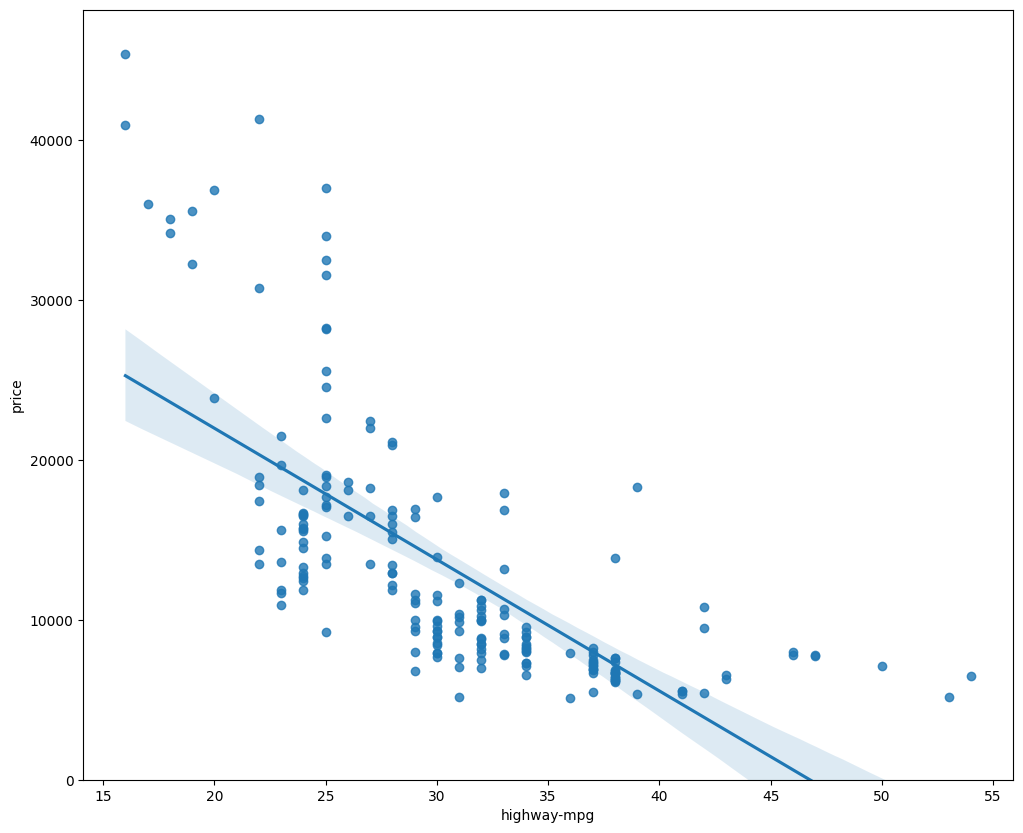

In [ ]:
#this will show a combination of scatter plot, as well as the fitted linear regression line going through the data

width = 12
height = 10
plt.figure (figsize = (width, height))
sns.regplot(x='highway-mpg', y = 'price', data = df)
plt.ylim(0,)

IMPORTANT!  

When we looking at a regression plot,  
pay attention to **how scattered the data points are around the regression line**

If the data is too far of from the line, the linear model might not be the best model for this data

<Axes: xlabel='peak-rpm', ylabel='price'>

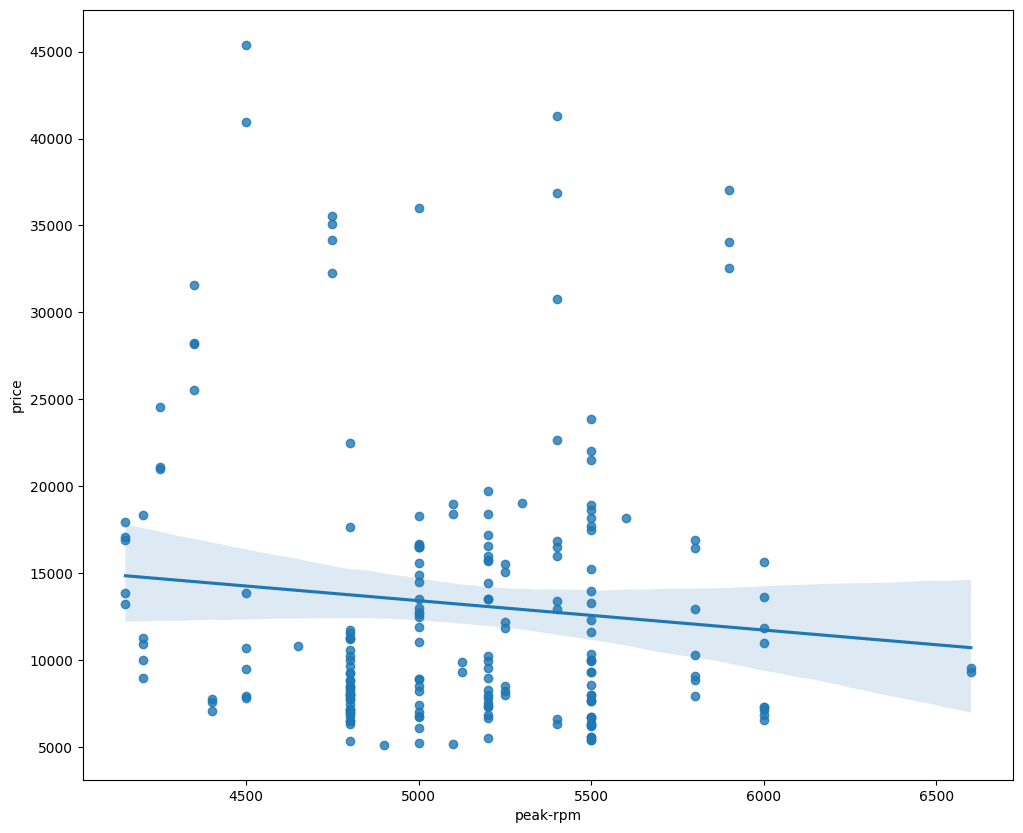

In [ ]:
#another regression plot
plt.figure(figsize=(width, height))
sns.regplot (x='peak-rpm', y='price', data = df)

In [ ]:
#now we will evaluate the pearson correlation of both visualization above
print(stats.pearsonr(df['peak-rpm'],df['price']))
print(stats.pearsonr(df['highway-mpg'], df['price']))

PearsonRResult(statistic=-0.10161587407588148, pvalue=0.15117691651445295)
PearsonRResult(statistic=-0.704692265058953, pvalue=1.749547114447557e-31)


### Residual Plot

<function matplotlib.pyplot.show(close=None, block=None)>

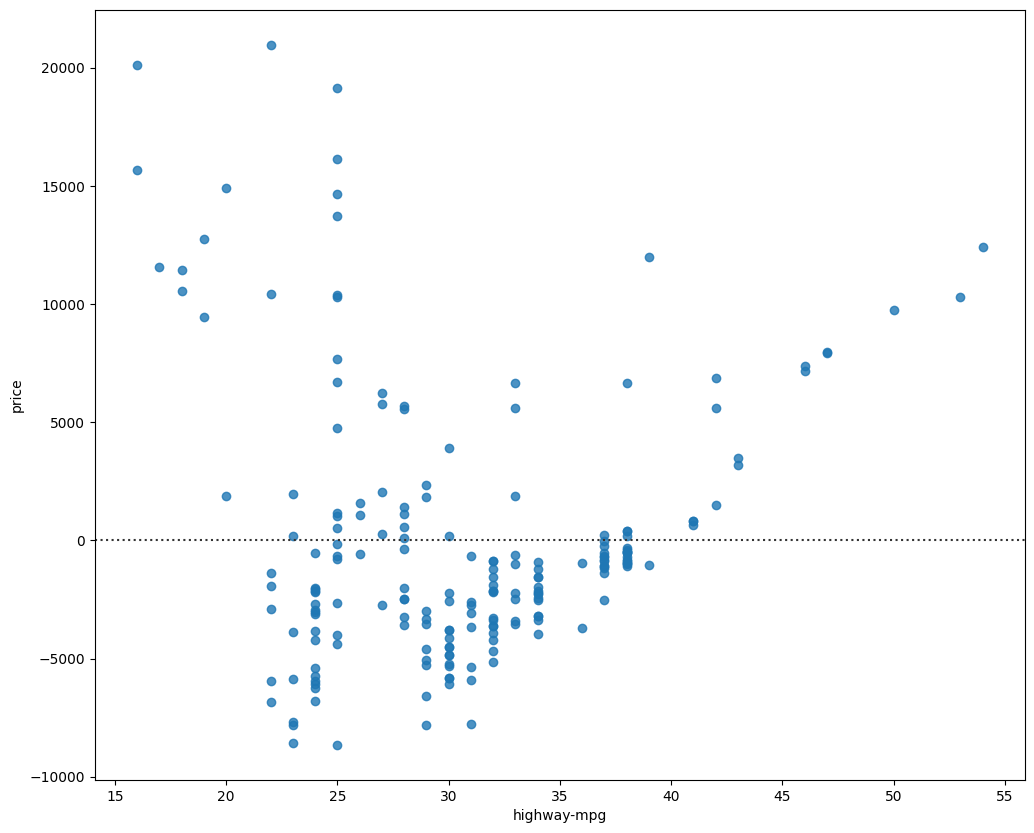

In [ ]:
# we will see about the residual plot between highway-mpg and price
plt.figure(figsize=(width, height))
sns.residplot(x = df['highway-mpg'], y = df['price'])
plt.show

IMPORTANT!

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data.

Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


### Multiple Linear Regression Visualization

In [ ]:
#create a yhat, which is a predicted result from the model
yhat = lm2.predict(c)

<ipython-input-85-91389ee9eec1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
<ipython-input-85-91389ee9eec1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Yhat, hist = False, color = 'b', label = 'Fitt

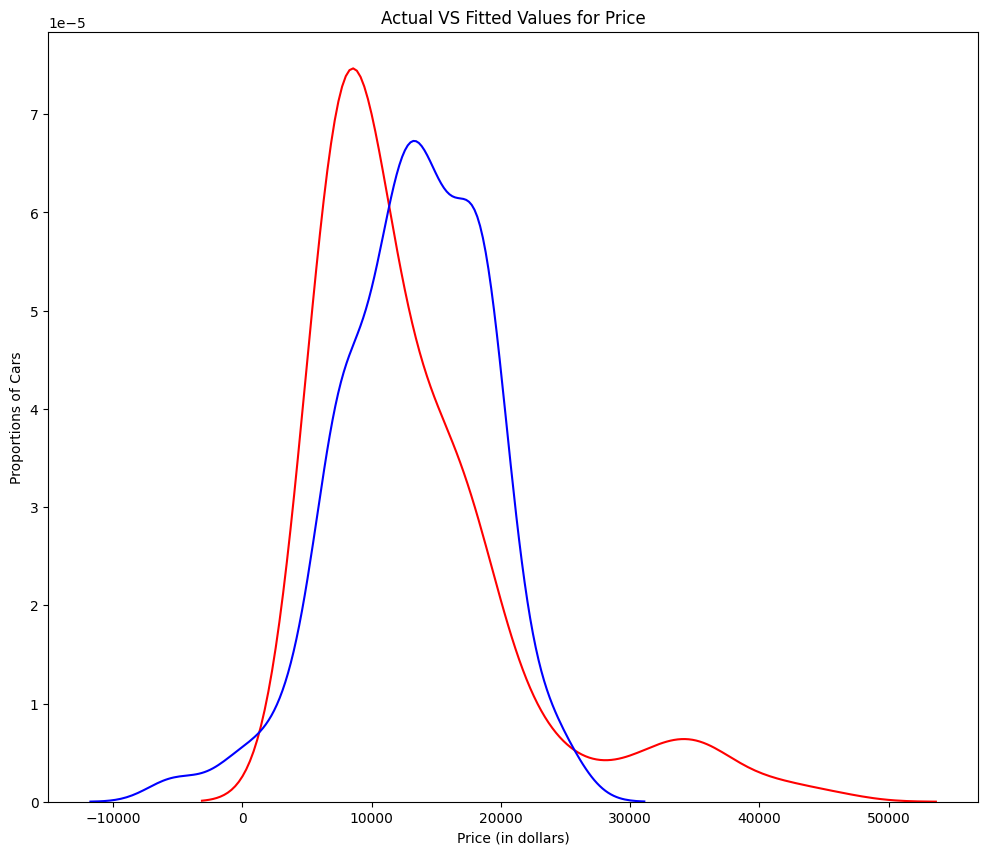

In [ ]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(Yhat, hist = False, color = 'b', label = 'Fitted Value')

plt.title("Actual VS Fitted Values for Price")
plt.xlabel('Price (in dollars)')
plt.ylabel("Proportions of Cars")

plt.show()
plt.close()

## Polynomial Regression

<center><b>DIFFERENT ORDERS OF POLYNOMIAL REGRESSION</center></b>  



<center><b>Quadratic - 2nd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2
$$


<center><b>Cubic - 3rd Order</b></center>
$$
Yhat = a + b_1 X +b_2 X^2 +b_3 X^3\\\\\\
$$


<center><b>Higher-Order</b>:</center>
$$
Y = a + b_1 X +b_2 X^2 +b_3 X^3 ....\\
$$


In [ ]:
#polynomial will be used when the highwaympg n price is not fit to the linear model

#create a function to display the polynomial regression
def plotpollynomial(model, indVar, depVar, name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)

    plt.plot(indVar, depVar, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(name)
    plt.ylabel('Price of Cars')

    plt.show()

In [ ]:
#get the variable
x = df['highway-mpg']
y = df['price']

In [ ]:
#use a polynomial model of the 3rd order
f = np.polyfit(x,y,3)
p = np.poly1d(f)
p

poly1d([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

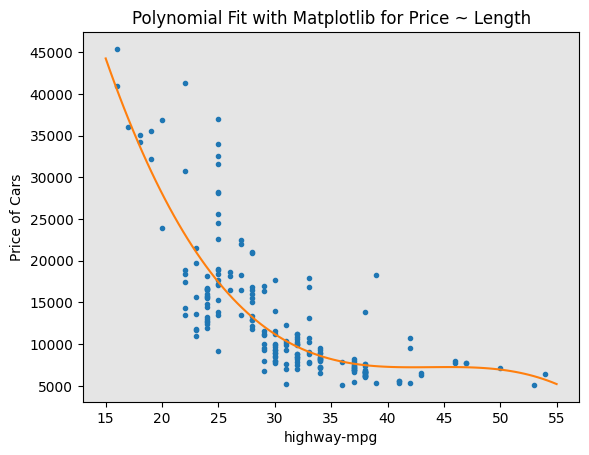

In [ ]:
#plot into the function
plotpollynomial(p, x, y, 'highway-mpg')

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>


**Exercise**

In [ ]:
#create 11 order polynomial model
ff = np.polyfit(x,y,11)
pp = np.poly1d(ff)
pp

poly1d([-1.24263391e-08,  4.72184893e-06, -8.02843483e-04,  8.05640304e-02,
       -5.29740982e+00,  2.39470329e+02, -7.58845740e+03,  1.68447254e+05,
       -2.56531153e+06,  2.55140622e+07, -1.49106965e+08,  3.87930088e+08])

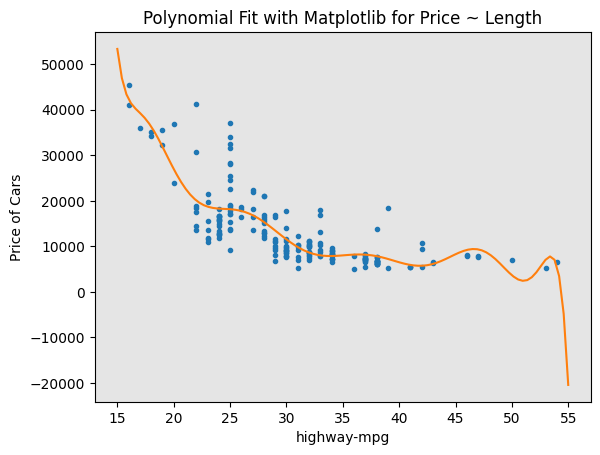

In [ ]:
plotpollynomial(pp, x, y, 'highway-mpg')

## Multivariate Polynomial Regression

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


In [ ]:
#import the appropiate module
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
#create polynomialfeatures object of degree 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
cpr = pr.fit_transform(c)
cpr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [ ]:
#the original data has 201 samples and 4 features
c.shape

(201, 4)

In [ ]:
#transformed data has 201 samples and 15 features
cpr.shape

(201, 15)

## Pipeline

In [ ]:
#import the needed library
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
#create a pipeline by create a list of tuples including the name of the model or estimator
#and its corresponding constructor

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model',LinearRegression())]
Input

[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [ ]:
#input the list as an argument to a pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
#first, convert the datatype z to float to avoid conversion warning
#then we can normalize the multivariate data, perform a transform and fit the model

c = c.astype(float)
y = df['price']
pipe.fit(c,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [ ]:
#produce the prediction
ypipe = pipe.predict(c)
ypipe[0:5]

array([13102.93329646, 13102.93329646, 18226.43450275, 10391.09183955,
       16135.53737535])

**EXERCISE**

In [ ]:
Input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(c,y)

ypipe = pipe.predict(c)
ypipe[0:10]

array([13699.07700462, 13699.07700462, 19052.71346719, 10620.61524404,
       15520.90025344, 13869.27463809, 15455.88834114, 15973.77411958,
       17612.7829335 , 10722.47987021])

## Measures for In-Sample Evaluation

### R^2

In [ ]:
#lets take a back to modelling the linreg
a = df[['highway-mpg']]
b = df[['price']]

LM = LinearRegression()

LM.fit(a,b)

#check out the r^2
LM.score(a,b)

0.4965911884339176

We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


#### MSE

In [ ]:
#define the yhat
yhat = LM.predict(a)

from sklearn.metrics import mean_squared_error as mse

MSE = mse(df['price'],yhat)
MSE

31635042.944639888

## Prediction n Decision Making

### Predicition

In [ ]:
#reshape (-1,1) to make it as a column, not a list anymore
value = np.arange(1, 100, 1).reshape(-1,1)

LM.fit(a,b)

yhat = LM.predict(value)
yhat[0:5]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487],
       [34314.63896655]])

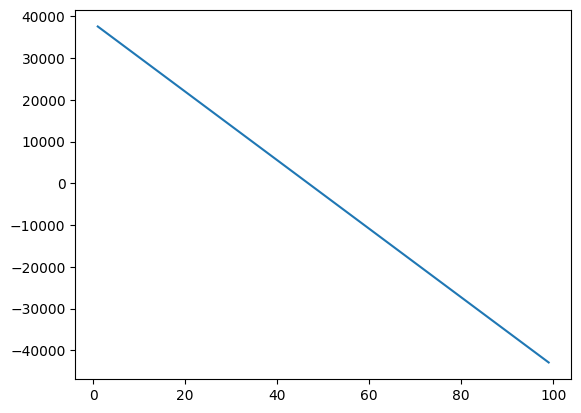

In [ ]:
#plot the input n output data
plt.plot(value, yhat)

### Decision Making

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

# 4. Model Evaluation and Refinement

We want to use only the **numeric** data

In [ ]:
dfnum = df._get_numeric_data()
dfnum.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,False,True,True,False
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,False,True,True,False
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,False,True,True,False
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,False,True,True,False
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,False,True,True,False


#### Create the Functions for Plotting

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    plt.figure(figsize = (width,height))

    ax1 = sns.kdeplot(RedFunction, color = 'r', label = RedName)
    ax2 = sns.kdeplot(BlueFunction, color = 'b', label =BlueName, ax = ax1)

    plt.title (Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

In [ ]:
def PollynomialPlot(xtrain, xtest, ytrain, ytest, lr, polyTransform):
    plt.figure(figsize=(width, height))

    #we have training n testing data, the linear regression object n polynomial transformation object
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])

    #create a x object for testing plot from the minimum value till the maximum value
    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, ytrain, 'ro', label = 'Training Data')
    plt.plot(xtest, ytest, 'go', label = 'Testing Data')
    plt.plot(x, lr.predict(polyTransform.fit_transform(x.reshape(-1,1))))
    plt.ylim([-10000,60000])
    plt.ylabel('Price')
    plt.legend

## Training and Testing Data

The training n testing data only work for **ONE DIMENSIONAL ARRAY**

In [ ]:
ydata = df['price']
ydata

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
5,15250.0
6,17710.0
7,18920.0
8,23875.0
9,16430.0


In [ ]:
#the x data is all of the values from data frame EXCLUDE the price itself
#x data is a dataframe from ALL THE INDEPENDENT VARIABLE
xdata = df.drop('price',axis = 1)
xdata

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,11.190476,8.703704,low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,27,11.190476,8.703704,low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,26,12.368421,9.038462,medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,30,9.791667,7.833333,low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,22,13.055556,10.681818,low,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,5400.0,23,28,10.217391,8.392857,low,False,True,True,False
197,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,5300.0,19,25,12.368421,9.400000,medium,False,True,False,True
198,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,5500.0,18,23,13.055556,10.217391,medium,False,True,True,False
199,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,4800.0,26,27,9.038462,8.703704,low,True,False,False,True


In [ ]:
#Split the data randomly into training n testing data
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.1, random_state=1)
#test size 0.1 means that we will split into 10% testing n 90% training data

print("Number of training data:",xtrain.shape[0], "testing data:", xtest.shape[0])

Number of training data: 180 testing data: 21


**EXERCISE**

In [ ]:
#change the proportion to 40% for testing
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(xdata, ydata, test_size=0.4, random_state=1)
print("Number of training data:",xtrain1.shape[0], "testing data:", xtest1.shape[0])

Number of training data: 120 testing data: 81


In [ ]:
#CREATE THE LINEAR REGRESSION OBJECT W/ 90% TRAINING
lre = LinearRegression()

#make the model using training data
lre.fit(xtrain[['horsepower']], ytrain)

#calculate the r^2 using the testing data
print ("Testing data r^2 score:",lre.score(xtest[['horsepower']], ytest))

#compare to the r^2 using the training data
print ("Training data score:",lre.score(xtrain[['horsepower']], ytrain))

Testing data r^2 score: 0.3635480624962413
Training data score: 0.662028747521533


In [ ]:
#CREATE THE LINEAR REGRESSION OBJECT W/ 60% TRAINING
lre1 = LinearRegression()

lre1.fit(xtrain1[['horsepower']], ytrain1)

print ("testing data",lre1.score(xtest1[['horsepower']], ytest1))
print ("training data", lre1.score(xtrain1[['horsepower']], ytrain1))

testing data 0.6112570260327648
training data 0.6755739621927235


## Cross-Validation Score

When we dont have sufficient testing data, then we need to perform a cross-validation method, which it will iterate all of the combination between the splitted training n testing data.  

The functions will split up the data into the specified number of folds, **with one fold for testing and other folds for training**

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#the parameter cv determines the number of folds
rcross = cross_val_score(lre, xdata[['horsepower']], ydata, cv = 4)
rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [ ]:
#calculate the average and standard deviation of our estimation
print ('mean:', rcross.mean(),'std:',rcross.std())

mean: 0.5220592359225414 std: 0.29130480666118436


**EXERCISE**

In [ ]:
rcross1 = cross_val_score(lre, xdata[['horsepower']], ydata, cv = 2)
print ('mean:',rcross1.mean(), 'std:', rcross1.std())

mean: 0.516835099979672 std: 0.07336982731492742


In [ ]:
#we can also predict values by using the cross_val_predict
from sklearn.model_selection import cross_val_predict
yhat1 = cross_val_predict(lre, xdata[['horsepower']], ydata, cv = 4)
yhat1[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

## Overfitting, Underfitting and Model Selection

The overfitting n underfitting condition often appears in **multiple linear regression n polynomial regression**

In [ ]:
#create the linear regression object
lro = LinearRegression()

lro.fit(xtrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ytrain)

LinearRegression()

In [ ]:
#predict using the training data
yhatTrain = lro.predict(xtrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [ ]:
#predict using the testing data
yhatTest = lro.predict(xtest[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

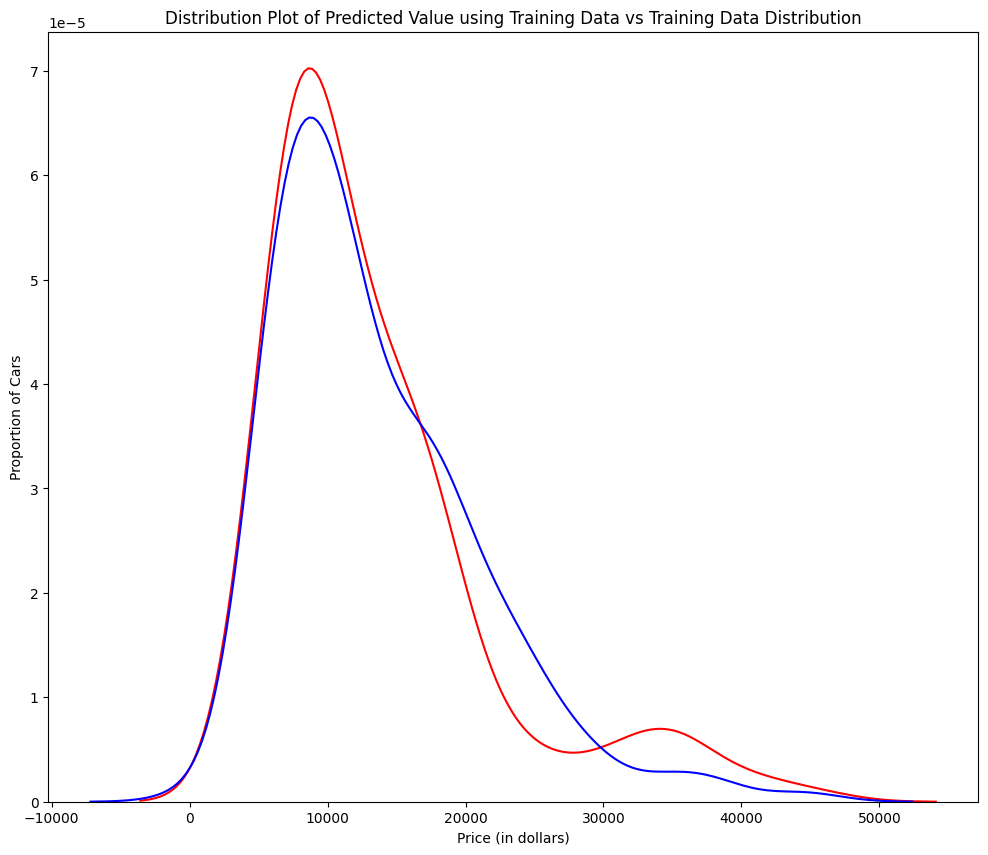

In [ ]:
#examine the distribution of predicted value from TRAINING DATA
Title = 'Distribution Plot of Predicted Value using Training Data vs Training Data Distribution'
DistributionPlot(ytrain, yhatTrain, 'Actual Values (Train)', 'Predicted Values (Train)', Title)

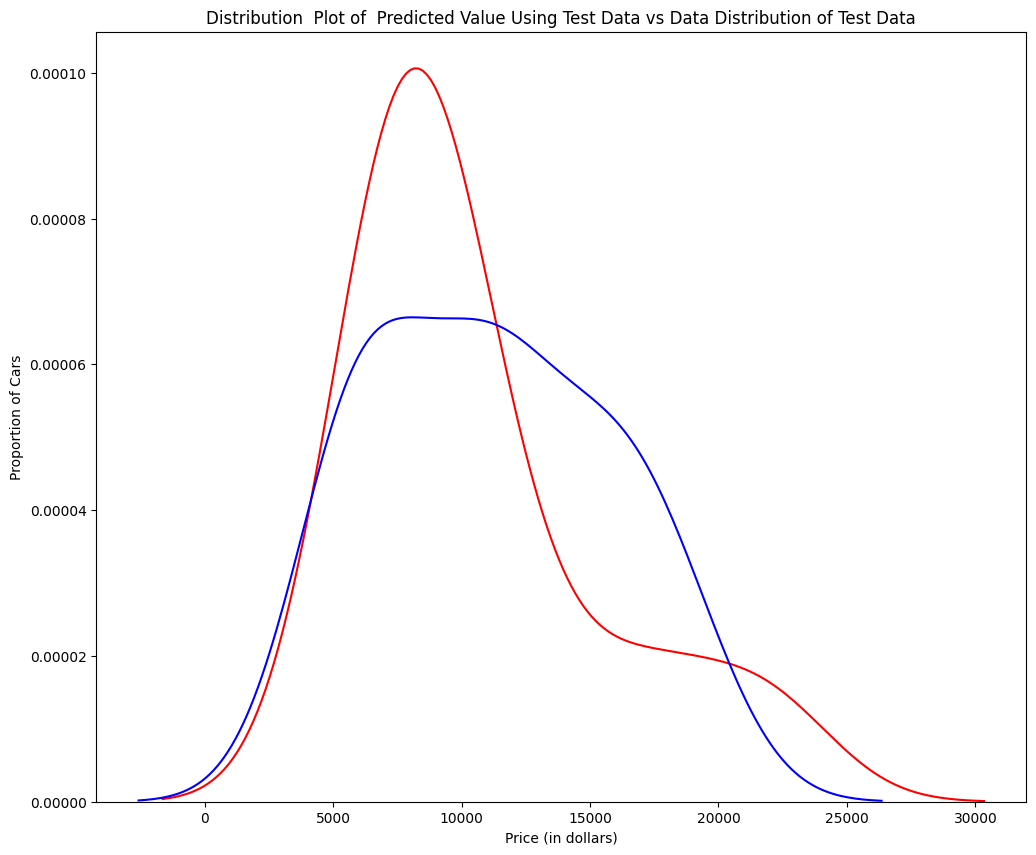

In [ ]:
#examine the distribution of real value vs predicted value using TESTING DATA
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ytest, yhatTest, 'Actual values (Test)', 'Predicted Values (Test)', Title)

<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


## Overfitting

Overfitting can occur when the model fits the noise, but not underlying process. So, when we test out model using test set, it doesnt perform as well since the noise

In [ ]:
#create 55 percent training data, and 45 percent for testing
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(xdata, ydata, test_size=0.45, random_state=0)

In [ ]:
#create 5 degree of polynomial transformation at the horsepower category
pr = PolynomialFeatures(degree = 5)

#transform pollynomially the training n testing data
xtrainpr = pr.fit_transform(xtrain2[['horsepower']])
xtestpr = pr.fit_transform(xtest2[['horsepower']])

pr

PolynomialFeatures(degree=5)

In [ ]:
#create a linear regression model to train the TRAINING SET
poly = LinearRegression()
poly.fit(xtrainpr, ytrain2)

#create a prediction using TESTING SET and search for the values of yhat
yhat = poly.predict(xtestpr)
yhat[0:5]

array([ 6727.58219945,  7306.70943225, 12213.70783901, 18895.03307984,
       19996.8349332 ])

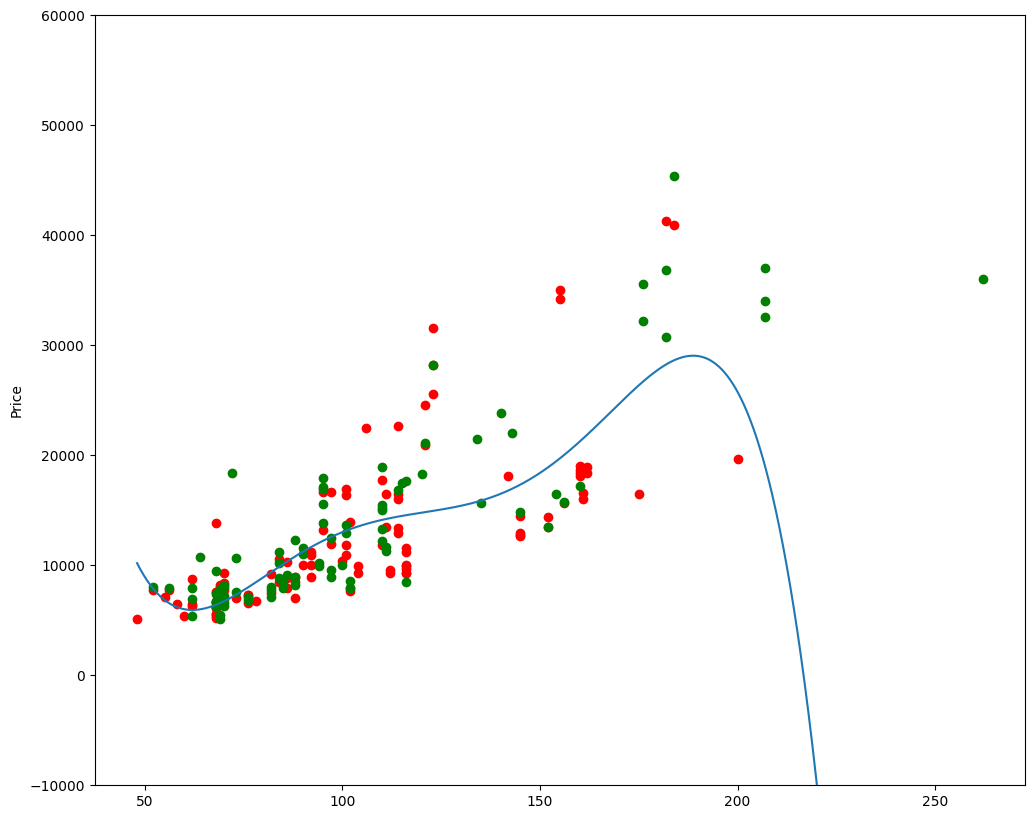

In [ ]:
#visualize the pollynomial plot to see the distribution of training, testing n predicted data
PollynomialPlot(xtrain2['horsepower'], xtest2['horsepower'], ytrain2, ytest2, poly, pr)
#pr is polynomial features with 5 degree
#poly is the linear regression after featured pollynomial

In [ ]:
#search for the r^2 to meassure the model between the FeaturedPollynomial n The Actual Data
train = poly.score(xtrainpr, ytrain2)
test = poly.score(xtestpr, ytest2)

print ('train:',train,'test:',test)

train: 0.5568527853920284 test: -29.815556299616322


The testing result, which is negative 29 indicates a sign of overfitting.  

Next, we are going to observe the R^2 score changes on the test data for different order polynomials with the plot of it results

Text(3.05, 0.74, 'Maximum R^2 ')

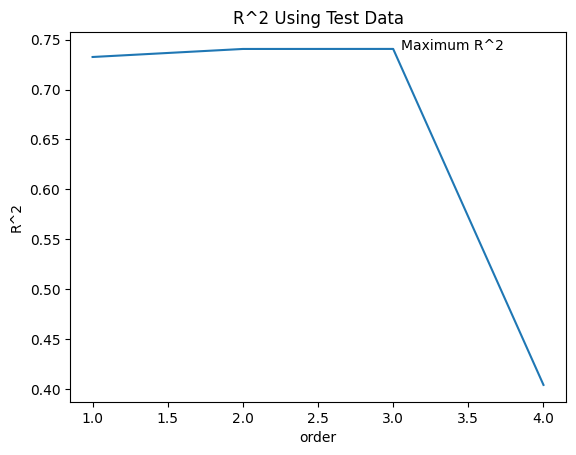

In [ ]:
r2Res = []
order = [1,2,3,4]
lr2 = LinearRegression()

for i in order:
    pr = PolynomialFeatures(degree = i)
    xtrainpr = pr.fit_transform(xtrain2[['horsepower']])
    xtestpr = pr.fit_transform(xtest2[['horsepower']])

    #fit the linear regression object from the featuredpollynomial variable
    lr2.fit(xtrainpr, ytrain2)

    #get the score result data with the different order
    r2Res.append(lr2.score(xtestpr, ytest2))

plt.plot(order, r2Res)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3.05, 0.74, 'Maximum R^2 ')

From the graph above, we can conclude that **the R^2 increases until the third order, after that it will dramatically decreases on the four order**

**EXERCISE**

Number of new features:  (110, 15) from the 4 features


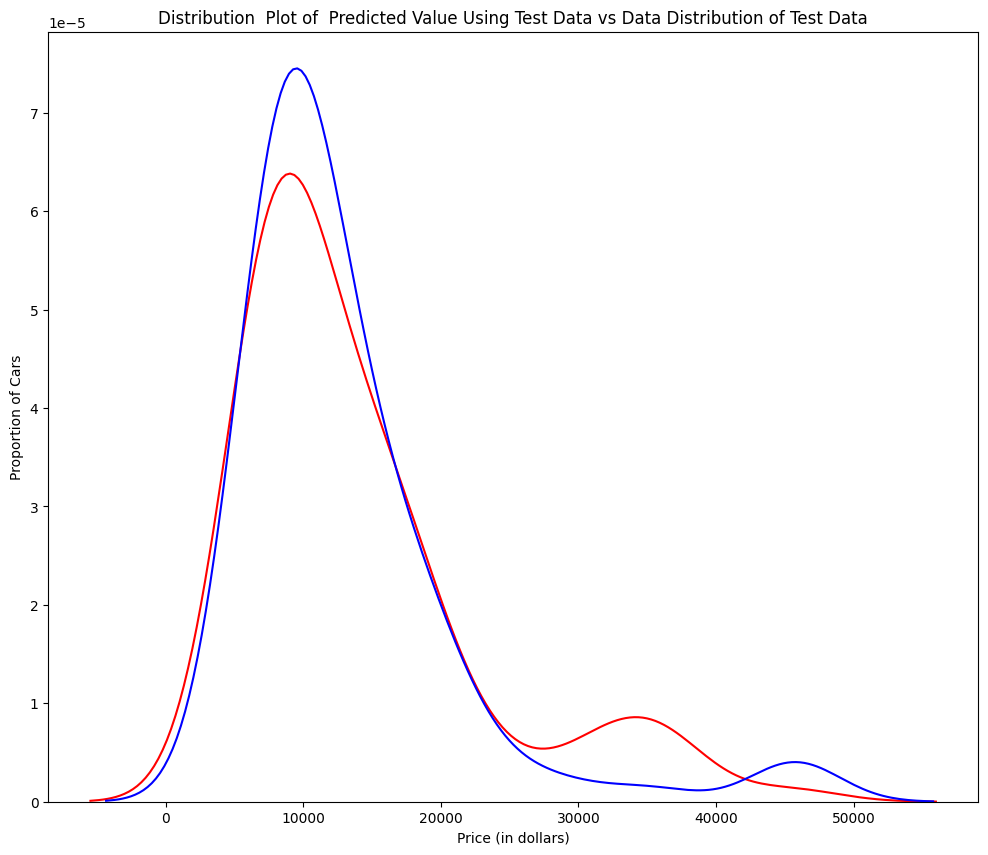

In [ ]:
pr1 = PolynomialFeatures(degree = 2)

xtrainpr1 = pr1.fit_transform(xtrain2[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
xtestpr1 = pr1.fit_transform(xtest2[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

print("Number of new features: ",xtrainpr1.shape, "from the 4 features")

poly1 = LinearRegression()
poly1.fit(xtrainpr1, ytrain2)
yhatTest2 = poly1.predict(xtestpr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(ytest2, yhatTest2, "Actual Values (Test)", "Predicted Values (Test)", Title)

## Ridge Regression

In [ ]:
#perform a degree two polynomial transformation on our data
pr2 = PolynomialFeatures(degree = 2)

xtrainpr2=pr2.fit_transform(xtrain2[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
xtestpr2=pr2.fit_transform(xtest2[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

from sklearn.linear_model import Ridge

#create a ridge regression object, n set it regularization parameter to 1
RModel = Ridge(alpha = 1)
RModel.fit(xtrainpr2, ytrain2)
yhatTest3 = RModel.predict(xtestpr2)

#comparation of the first four predicted samples
print('predicted:', yhatTest3[0:4])
print('test set :', ytest2[0:4].values)

predicted: [ 6572.19586866  9634.40697746 20948.17104272 19403.38016094]
test set : [ 6295. 10698. 13860. 13499.]


In [ ]:
#we select the value of alpha that can minimizes the test error
#we can use a loop, n created a progress bar to see how many interations that have completed

from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(xtrainpr2, ytrain2)
    test_score, train_score = RigeModel.score(xtestpr2, ytest2), RigeModel.score(xtrainpr2, ytrain2)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:17<00:00, 57.88it/s, Test Score=0.564, Train Score=0.859]


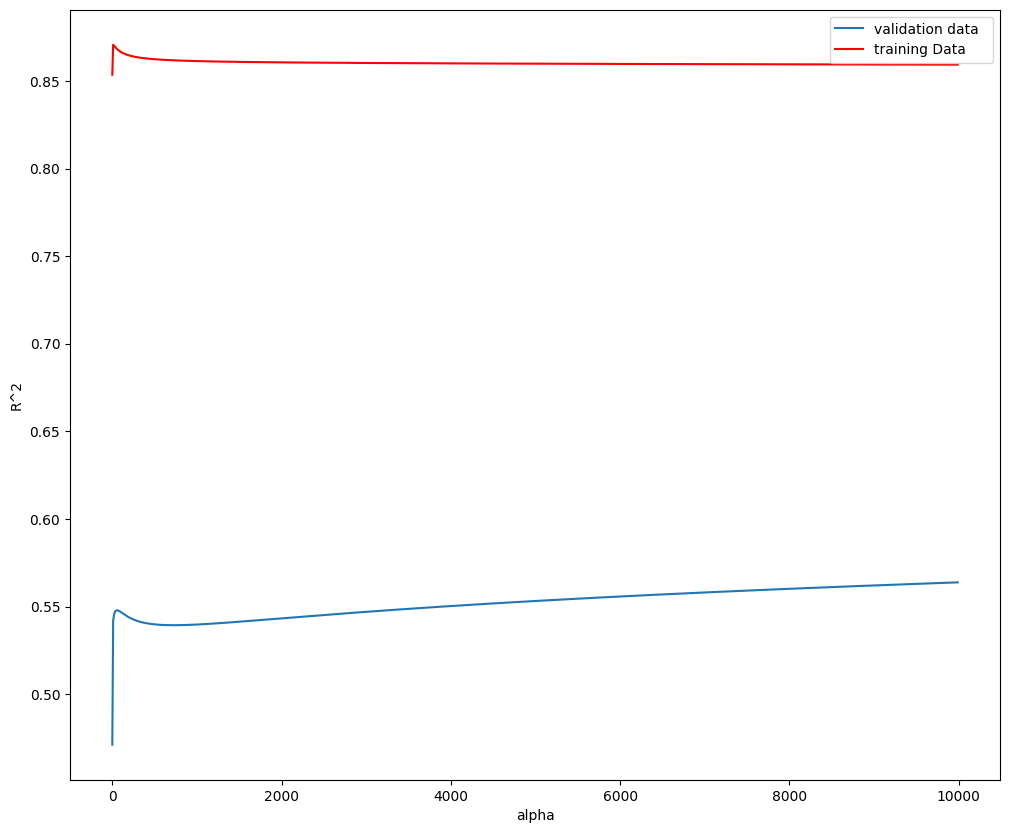

In [ ]:
# we also can plot out the value of R^2 for different alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

## Grid Search

GridSearch is a class to make the process of finding the best hyperparameter will be simpler

In [ ]:
from sklearn.model_selection import GridSearchCV

#create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

#create ridge regression object
rr = Ridge()

#create a ridge grid search object
grid1 = GridSearchCV(rr, parameters1, cv = 4)

#fit to the created model
grid1.fit(xdata[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ydata)

#obtain the estimator with the best parameters
bestrr = grid1.best_estimator_
print('best parameters:', bestrr)

#test our model with tested data
bestrr.score(xtest2[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ytest2)

best parameters: Ridge(alpha=10000)


0.8411781387793232